In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# disordered sequences
disorder_interact = pd.read_csv('./data/rg_id_interacting_disordered_domains.tsv', sep='\t')
disorder_iupred = pd.read_csv('./data/disordered_sequences_with_iupred.tsv', sep='\t')
di = disorder_interact[['pdb_id', 'idp_id', 'receptor_id', 'idp_uniprot', 'receptor_uniprot',
                        'receptor_interacting_domains',
                        'receptor_domain_locations', 'receptor_iupred',
                        'receptor_perc_overlap']]
disorder_iupred


,uniprot,location,sequence,length,mean_iupred_score_long,per_residue_iupred
0,P59226,1-43,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRFR,43,0.938605,"[0.9562, 0.9488, 0.9457, 0.9433, 0.9503, 0.936..."
1,S1N325,1-78,MKMKAKYWYAYILFMLVGLLAGGMNIRAANIDDYFNSDYYYGYPEG...,78,0.065331,"[0.0046, 0.0039, 0.0036, 0.0027, 0.0026, 0.002..."
2,S1N325,230-267,TSVSLDTPDANFEVYIYETAYPNNVQRLISVGIRGGAS,38,0.255753,"[0.5807, 0.391, 0.4582, 0.384, 0.3149, 0.2399,..."
3,S1N325,355-365,RTKTYTNPKQG,11,0.912600,"[0.9126, 0.9126, 0.9126, 0.9126, 0.9126, 0.912..."
4,S1N325,501-510,NKEYTNPKEG,10,0.882800,"[0.8828, 0.8828, 0.8828, 0.8828, 0.8828, 0.882..."
...,...,...,...,...,...,...
486,P02730,1-54,MEELQDDYEDMMEENLEQEEYEDPDIPESQMEEPAAHDTEATATDY...,54,0.977556,"[0.9717, 0.9577, 0.9733, 0.9816, 0.9816, 0.971..."
487,P02730,329-377,EQALLSLVPVQRELLRRRYQSSPAKPDSSFYKGLDLNGGPDDPLQQTGQ,49,0.645927,"[0.374, 0.4087, 0.4619, 0.3983, 0.346, 0.3704,..."
488,P02730,555-564,YNVLMVPKPQ,10,0.191400,"[0.1914, 0.1914, 0.1914, 0.1914, 0.1914, 0.191..."
489,P02730,890-911,DAKATFDEEEGRDEYDEVAMPV,22,0.823400,"[0.8565, 0.805, 0.8493, 0.8828, 0.7843, 0.8125..."


In [50]:
disorder_iupred['domain'] = disorder_iupred.apply(lambda x: '_'.join([x['uniprot'], x['location']]), axis=1)

In [58]:
di = di[di['receptor_interacting_domains'].notna()]
di_receptor = di[['pdb_id', 'idp_id', 'receptor_id', 
                    'receptor_interacting_domains',
                    'receptor_domain_locations', 'receptor_iupred',
                    'receptor_perc_overlap']]

columns = ['receptor_interacting_domains', 'receptor_domain_locations', 
            'receptor_iupred', 'receptor_perc_overlap']
for col in columns:
    di_receptor[col] = di_receptor.apply(lambda x: x[col].split(';'), axis=1)

di_receptor = di_receptor.explode(columns)


C:\Users\Admin\AppData\Local\Temp\ipykernel_52012\2066570093.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  di_receptor[col] = di_receptor.apply(lambda x: x[col].split(';'), axis=1)


In [59]:
df = pd.merge(di_receptor, disorder_iupred[['domain', 'per_residue_iupred']],
              left_on='receptor_interacting_domains', 
              right_on='domain')
df

,pdb_id,idp_id,receptor_id,receptor_interacting_domains,receptor_domain_locations,receptor_iupred,receptor_perc_overlap,domain,per_residue_iupred
0,7T7T,W,A,A0A2H5Q1B8_1-165,1-165,0.24,0.848:24,A0A2H5Q1B8_1-165,"[0.5493, 0.5577, 0.562, 0.5382, 0.4292, 0.4441..."
1,7T7T,W,A,A0A2H5Q1B8_280-1307,280-1307,0.22,0.891:29,A0A2H5Q1B8_280-1307,"[0.5342, 0.4087, 0.4441, 0.4725, 0.5098, 0.418..."
2,6G04,B,A,Q06672_111-205,111-205,0.53,0.929:6,Q06672_111-205,"[0.1298, 0.1914, 0.1501, 0.2034, 0.1702, 0.219..."
3,6K06,A,C,P52293_191-247,191-247,0.13,1.0:6,P52293_191-247,"[0.0749, 0.107, 0.1323, 0.1611, 0.1583, 0.0929..."
4,6M64,F,E,Q15796_444-467,444-467,0.44,1.0:5,Q15796_444-467,"[0.2783, 0.3286, 0.3215, 0.3631, 0.3807, 0.444..."
5,6KU0,B,A,Q99104_1277-1684,1277-1684,0.32,0.451:28,Q99104_1277-1684,"[0.8681, 0.8741, 0.8565, 0.8655, 0.8828, 0.882..."
6,7PKU,B,A,P0DTD1_424-879,424-879,0.13,0.107:21,P0DTD1_424-879,"[0.268, 0.3215, 0.3631, 0.3807, 0.3117, 0.2503..."
7,6IUA,B,A,P52293_191-247,191-247,0.13,1.0:7,P52293_191-247,"[0.0749, 0.107, 0.1323, 0.1611, 0.1583, 0.0929..."
8,7N9H,A,C,P52292_191-244,191-244,0.09,1.0:9,P52292_191-244,"[0.0443, 0.069, 0.0356, 0.0494, 0.0494, 0.0389..."
9,7JPN,H,A,P61157_239-267,239-267,0.2,1.0:5,P61157_239-267,"[0.2503, 0.2752, 0.2884, 0.2064, 0.1643, 0.182..."


(0.0, 1.0)

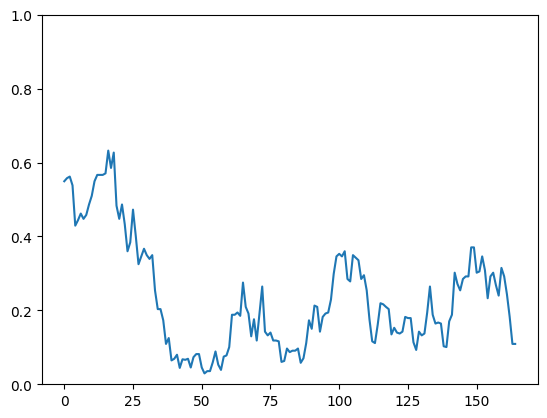

In [66]:
from ast import literal_eval
import matplotlib.pyplot as plt
iupred_scores = literal_eval(df.loc[0, 'per_residue_iupred'])
plt.plot(iupred_scores)
plt.ylim(0,1)

In [45]:
domains_interact = pd.read_csv('./data/rg_id_interacting_domains.tsv', sep='\t')
domains_interact = domains_interact.fillna('-')
domains_interact[(domains_interact['idp_interacting_domains'] != '-') & (domains_interact['receptor_interacting_domains'] == '-')]

,pdb_id,idp_id,receptor_id,idp_uniprot,receptor_uniprot,num_contacts,interacting_pairs,idp_interface_res,idp_num_interface_res,idp_interface_sequence,...,receptor_interface_start,receptor_interface_end,idp_interacting_domains,idp_domain_locations,idp_domain_ids,idp_perc_overlap,receptor_interacting_domains,receptor_domain_locations,receptor_domain_ids,receptor_perc_overlap
30,8B8V,B,A,P22363:1:68:1,Q8JXF6:1:427:24,81.0,"[('22:GLU', '252:THR'), ('28:ILE', '239:LEU'),...","{'9:SER', '29:ASN', '14:GLY', '5:PHE', '12:ARG...",24.0,IFVNPS-IR-GL----MAEETV-LIN-NI--N--HL,...,149.0,414.0,Phosphoprotein,1-296,PF03012,0.122:24,-,-,-,-
56,7ADT,C,B,Q07812:1:28:50,A0A0R8HV90:6:143:1,82.0,"[('74:MET', '141:HIS'), ('63:LEU', '54:GLU'), ...","{'68:ASP', '70:LEU', '76:LEU', '65:ARG', '67:G...",20.0,ST--LSECLKRIGD-LDSNMELQ,...,39.0,141.0,"Apoptosis regulator proteins, Bcl-2 family",63-158,PF00452,1.0:14,-,-,-,-
68,5NT1,E,F,Q14258:4:190:190,P03496:4:151:80,6.0,"[('254:ALA', '138:PHE'), ('255:SER', '138:PHE'...","{'258:THR', '255:SER', '251:LEU', '261:ARG', '...",5.0,L--AS--T--R,...,137.0,142.0,TRIM protein coiled-coil region,217-350,PF25600,0.083:5,-,-,-,-
90,7P0U,G,F,O00198:1:26:26,A0A0R8HV90:6:143:1,73.0,"[('40:LEU', '53:GLN'), ('30:ALA', '73:ALA'), (...","{'40:LEU', '37:LEU', '47:ARG', '46:GLN', '34:A...",17.0,AA--TA-RLKALGDELHQRT,...,42.0,141.0,Activator of apoptosis harakiri,1-91,PF15196,0.22:17,-,-,-,-
97,7P0S,U,A,Q9BXH1:1:26:130,A0A0R8HV90:6:143:1,74.0,"[('152:TYR', '141:HIS'), ('145:ALA', '87:ARG')...","{'155:ARG', '144:MET', '141:LEU', '142:ARG', '...",17.0,WA--IG-QLR-MAD-LNAQYE-R,...,42.0,141.0,"Bcl-2-binding component 3, p53 upregulated mod...",2-193,PF15826,0.12:17,-,-,-,-


In [48]:
domains = pd.read_csv("./data/rg_id_all_pfam_domains.csv")
domains[domains['uniprot'] == 'P03496']

,uniprot,domain_name,domain_id,domain_location,domain_sequence,domain_mean_iupred,domain_per_residue_iupred
447,P03496,Influenza non-structural protein (NS1),PF00600,1-217,MDPNTVSSFQVDCFLWHVRKRVADQELGDAPFLDRLRRDQKSLRGR...,0.293082,"[0.4476, 0.4831, 0.422, 0.3019, 0.2364, 0.1528..."


## Some statistics

PDBs that do not have PFAM IDs assigned (both idp and receptor): 4
- 6KU0: no domain included in pdb sequence for idp; DIL domain for receptor (Q99104) in PDB structure, but does not interact with idp
- 7CU1: no domain included in pdb sequence for both idp and receptor
- 7T6A: no pfam domains associated with idp and receptor
- 7B2B: no domain included in pdb sequence for idp; Phosphopantetheine attachment site for receptor (W1J0W9) in PDB structure, only has 1 residue in the interface

PDBs that do not have PFAM IDs / domains assigned (only receptor): 5
- 8B8V: Rhabdovirus nucleocapsid protein domain of receptor (Q8JXF6) contains the pdb sequence - might be due to mutations in the sequence itself
- 7ADT, 7P0U, 7P0S: no pfam domains associated with receptor
- 5NT1: Influenza non-structural protein (NS1) domain of receptor (P03496) contains the pdb sequence - might be due to mutations in the sequence itself



## Obtaining the random set

In [10]:
import pandas as pd
import random
import requests
import re

def random_pairing(set1, set2, n=10, seed=None):
    if seed is not None:
        random.seed(seed)

    if len(set1) < n or len(set2) < n:
        raise ValueError("Each set must contain at least n elements")

    sample1 = random.sample(list(set1), n)
    sample2 = random.sample(list(set2), n)

    return list(zip(sample1, sample2))

# create negative set - blind set
df = pd.read_csv('./data/uniprot_idp_domain_receptor_predictions.tsv', sep='\t')
idp = df['uniprot_1'].unique().tolist()
receptor = df['uniprot_2'].unique().tolist()


In [7]:
# get domains
domains = pd.read_csv('./data/rg_id_all_pfam_domains.csv')
domains

,uniprot,domain_name,domain_id,domain_location,domain_sequence,domain_mean_iupred,domain_per_residue_iupred
0,P59226,Core histone H2A/H2B/H3/H4 domain,PF00125,44-131,PGTVALREIRKYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSA...,0.110936,"[0.2752, 0.1611, 0.2094, 0.247, 0.2783, 0.3149..."
1,S1N325,Cna protein B-type domain,PF05738,268-354,VKVTKKWIGSPADKITINLLANGKKIRSQVLTAENKKGNDWVYQFT...,0.242347,"[0.2364, 0.2292, 0.2752, 0.3019, 0.2224, 0.250..."
2,S1N325,Thioester domain,PF08341,79-229,VVYCLNEEIKPPSSEQTPFKSDGSYKNNFDVFLKLNGAREQLYKRK...,0.359217,"[0.1528, 0.2436, 0.2752, 0.3053, 0.3494, 0.387..."
3,S1N325,Prealbumin-like fold domain,PF17802,810-885,ISKQNLGGEEIAGASIQIKDTTGKVIEAWISQAGQSHQLTLSAGTY...,0.226853,"[0.346, 0.3286, 0.3599, 0.3426, 0.3667, 0.2783..."
4,S1N325,Prealbumin-like fold domain,PF17802,939-1017,EVIISKQNLGGEEIAGASIQIKDTTGKVVEAWVSQAGQSHQLTLPA...,0.240003,"[0.1914, 0.2752, 0.346, 0.247, 0.2399, 0.2752,..."
...,...,...,...,...,...,...,...
511,Q8UWD5,"Apoptosis regulator proteins, Bcl-2 family",PF00452,35-136,MRYLAKEMEQQHRTKFRSLSQEFLDTCGADPSKCLQSVMRELVGDG...,0.282933,"[0.3356, 0.3631, 0.3807, 0.4149, 0.4292, 0.318..."
512,P02730,HCO3- transporter integral membrane domain,PF00955,378-554,LFGGLVRDIRRRYPYYLSDITDAFSPQVLAAVIFIYFAALSPAITF...,0.008605,"[0.0087, 0.0123, 0.0085, 0.0143, 0.0096, 0.007..."
513,P02730,HCO3- transporter integral membrane domain,PF00955,565-889,GPLPNTALLSLVLMAGTFFFAMMLRKFKNSSYFPGKLRRVIGDFGV...,0.035147,"[0.0463, 0.0263, 0.0141, 0.0125, 0.0125, 0.017..."
514,P02730,Band 3 cytoplasmic domain,PF07565,55-328,HKVYVELQELVMDEKNQELRWMEAARWVQLEENLGENGAWGRPHLS...,0.246441,"[0.0287, 0.0327, 0.0543, 0.087, 0.1137, 0.1583..."


In [3]:
pairs = random_pairing(idp, receptor)
pairs

[('Q12888', 'P18851'),
 ('F2R912', 'S1N325'),
 ('Q07812', 'P23128'),
 ('P16286', 'P0A8K1'),
 ('Q3UHD1', 'F2R911'),
 ('O15226', 'Q14657'),
 ('P0A6S5', 'O00629'),
 ('O95835', 'P68135'),
 ('Q14258', 'Q6FVN3'),
 ('P32597', 'P32598')]

In [25]:
def get_full_sequence(uniprot):
    # get sequence 
    if not uniprot:
        return ''
    seq_url = f'https://rest.uniprot.org/uniprotkb/{uniprot}.fasta'
    seq_response = requests.get(seq_url)
    seq_response.raise_for_status()
    full_sequence = ''.join(seq_response.text.splitlines()[1:])
    return full_sequence

def abbreviate_domain_name(name):
    clean = re.sub(r"[^A-Za-z0-9]", ' ', name)
    abbreviate = [x[0].upper() for x in clean.split(" ") if x.isalnum()]
    return ''.join(abbreviate)

def match_uniprot_vs_domain(uniprot1, seq1, domain2):
    location1 = '-'.join([str(1), str(len(seq1))])

    matches = []
    for domain in domain2:
        uniprot2 = domain['uniprot']
        domain2 = abbreviate_domain_name(domain['domain_name'])
        domain_loc2 = domain['domain_location']
        seq2 = domain['domain_sequence']

        complex_seq = ':'.join([seq1, seq2])
        jobname = '_'.join([uniprot1, 'full', location1, uniprot2, domain2, domain_loc2])

        matches.append((jobname, complex_seq))
    
    return matches

def get_predictions(pairs, domain_df):

    idp_receptor_sequences = []
    receptor_idp_sequences = []

    for pair in pairs:
        idp = pair[0]
        receptor = pair[1]

        # get sequences
        domain_idp = domain_df[domain_df['uniprot'] == idp].to_dict(orient='records')
        sequence_idp = get_full_sequence(idp)

        domain_receptor = domain_df[domain_df['uniprot'] == receptor].to_dict(orient='records')
        sequence_receptor = get_full_sequence(receptor)

        # uniprot idp, domain receptor
        idp_receptor = match_uniprot_vs_domain(idp, sequence_idp, domain_receptor)
        # uniprot receptor, domain idp
        receptor_idp = match_uniprot_vs_domain(receptor, sequence_receptor, domain_idp)

        idp_receptor_sequences += idp_receptor
        receptor_idp_sequences += receptor_idp

    return idp_receptor_sequences, receptor_idp_sequences

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

def write_fasta_file(sequences, filename):
    records = [SeqRecord(Seq(seq), id=jobname, description="") for jobname, seq in sequences]
    SeqIO.write(records, filename, "fasta")

In [26]:
idp_receptor, receptor_idp = get_predictions(pairs, domains)

In [28]:
len(idp_receptor)

31

In [29]:
write_fasta_file(idp_receptor, 'random_uniprot_idp_domain_receptor.fasta')
write_fasta_file(receptor_idp, 'random_uniprot_receptor_domain_idp.fasta')

In [2]:
from sklearn.feature_selection import RFECV

In [ ]:
# RFECV = recursive feature elimination wih cross-validation to select feature
# auto finds the optimal number of features
rfecv = RFECV(estimator)